# NLP using Word Vectors

In [2]:
import numpy as np
import pandas as pd

### Regular word encoding (one-hot-encodding & word-count-vectorisation)

In [2]:
from sklearn.feature_extraction.text import CountVectorizer 

In [54]:
text_data = ['the cat sat on the car',
       'the data is on the boat',
       'why is my cat on the boat']

In [45]:
encoder = CountVectorizer()
encoder.fit(text_data)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [46]:
word_count_data = encoder.transform(text_data).todense()
word_count_data

matrix([[0, 1, 1, 0, 0, 0, 1, 1, 2, 0],
        [1, 0, 0, 1, 1, 0, 1, 0, 2, 0],
        [1, 0, 1, 0, 1, 1, 1, 0, 1, 1]])

In [47]:
word_labels = encoder.get_feature_names()
word_labels

['boat', 'car', 'cat', 'data', 'is', 'my', 'on', 'sat', 'the', 'why']

In [48]:
word_count_df = pd.DataFrame(word_count_data, columns = word_labels)
word_count_df

,boat,car,cat,data,is,my,on,sat,the,why
0,0,1,1,0,0,0,1,1,2,0
1,1,0,0,1,1,0,1,0,2,0
2,1,0,1,0,1,1,1,0,1,1


### What are word vectors

In [1]:
import spacy

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [50]:
nlp = spacy.load('en_core_web_md')

### How to use word vectors for comparing word similarity

In [80]:
def get_text_vectors(texts):
    vectors = []
    for text in texts:
        vector = nlp(text).vector
        vectors.append(vector)
    vectors = np.array(vectors)
    return vectors

In [81]:
word_vectors = get_text_vectors(word_labels)

In [82]:
pca = PCA(n_components=2)
pca.fit(word_vectors)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [83]:
word_vectors_2 = pca.transform(word_vectors)

In [140]:
def plot_text_vectors(text, vectors):
    plt.scatter(x=vectors[:,0], 
                y=vectors[:,1], 
                alpha=0.4)

    for word, x_y in zip(text, vectors):
        x, y = x_y
        plt.text(x, y, word, size=13)

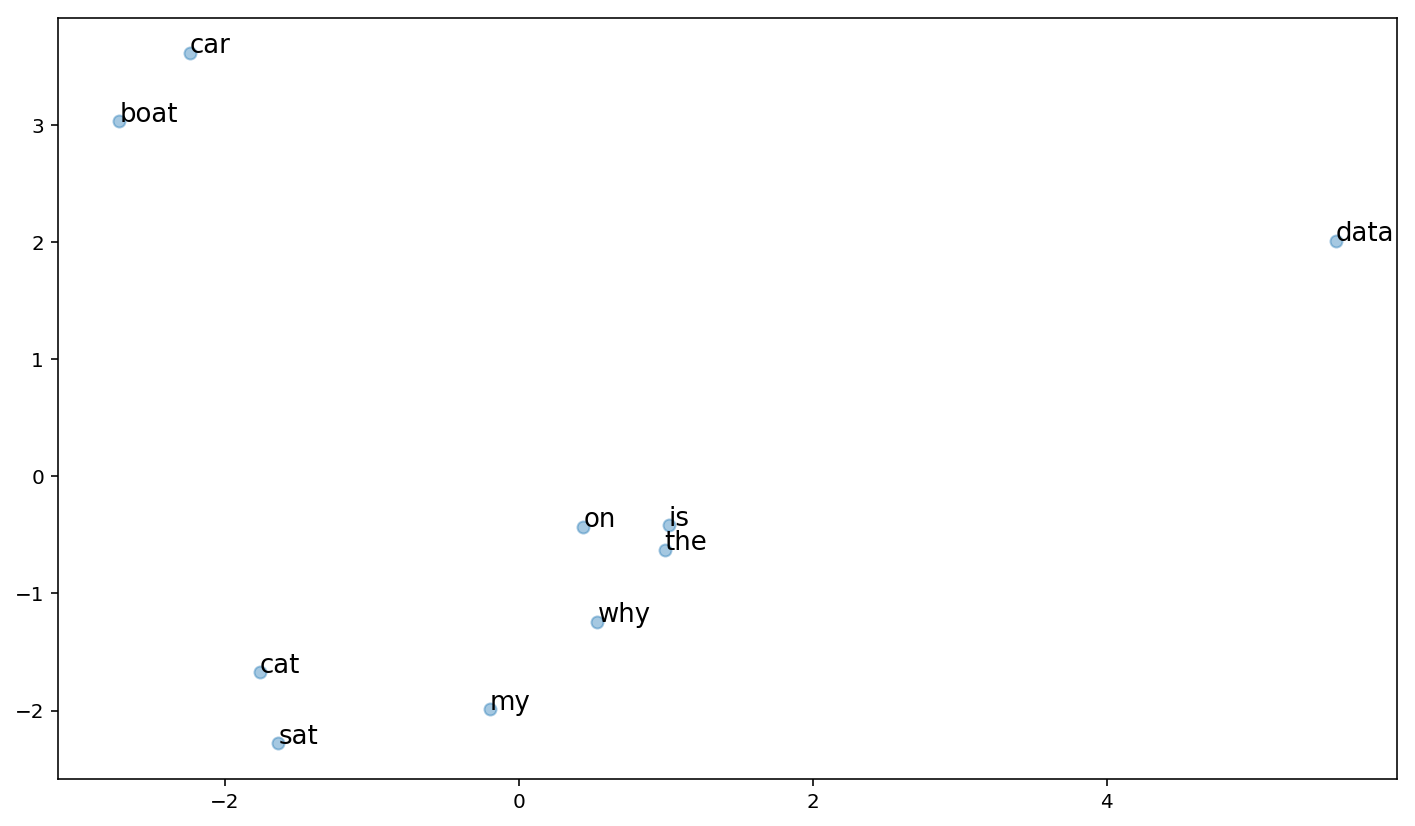

In [141]:
plt.figure(figsize=(12,7))

plot_text_vectors(word_labels, word_vectors_2)

plt.show()

### How to get a simple document vector

Just by averaging the word vectors in a document.

In [86]:
doc_vectors = get_text_vectors(text_data)

In [87]:
doc_vectors.shape

(3, 300)

In [88]:
doc_vectors_2 = pca.transform(doc_vectors)

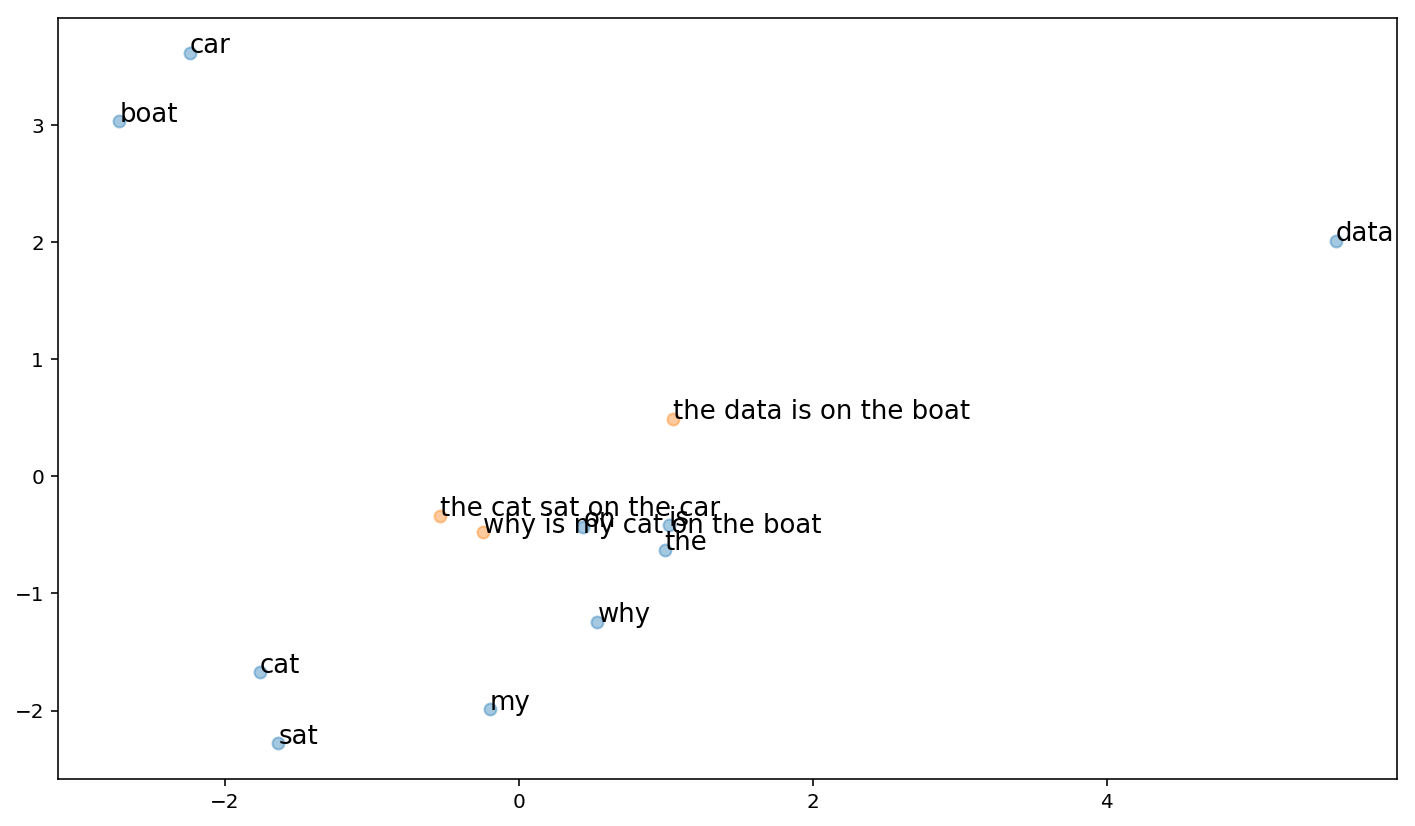

In [142]:
plt.figure(figsize=(12,7))

plot_text_vectors(word_labels, word_vectors_2)

plot_text_vectors(text_data, doc_vectors_2)    
    
plt.show()

### Improve document vector through stop word removal

In [69]:
from spacy.lang.en.stop_words import STOP_WORDS

In [113]:
def remove_stop_words(text):
    return ' '.join([word for word in text.split(' ') if word not in STOP_WORDS])

In [116]:
text_wo_stop_words = [remove_stop_words(doc) for doc in text_data]
text_wo_stop_words

['cat sat car', 'data boat', 'cat boat']

In [117]:
text_wo_stop_words_vectors = get_text_vectors(text_wo_stop_words)
text_wo_stop_words_vectors.shape

(3, 300)

In [118]:
text_wo_stop_words_vectors_2 = pca.transform(text_wo_stop_words_vectors)
text_wo_stop_words_vectors_2

array([[-1.87877553, -0.11184559],
       [ 1.42031536,  2.52090286],
       [-2.23974034,  0.67976002]])

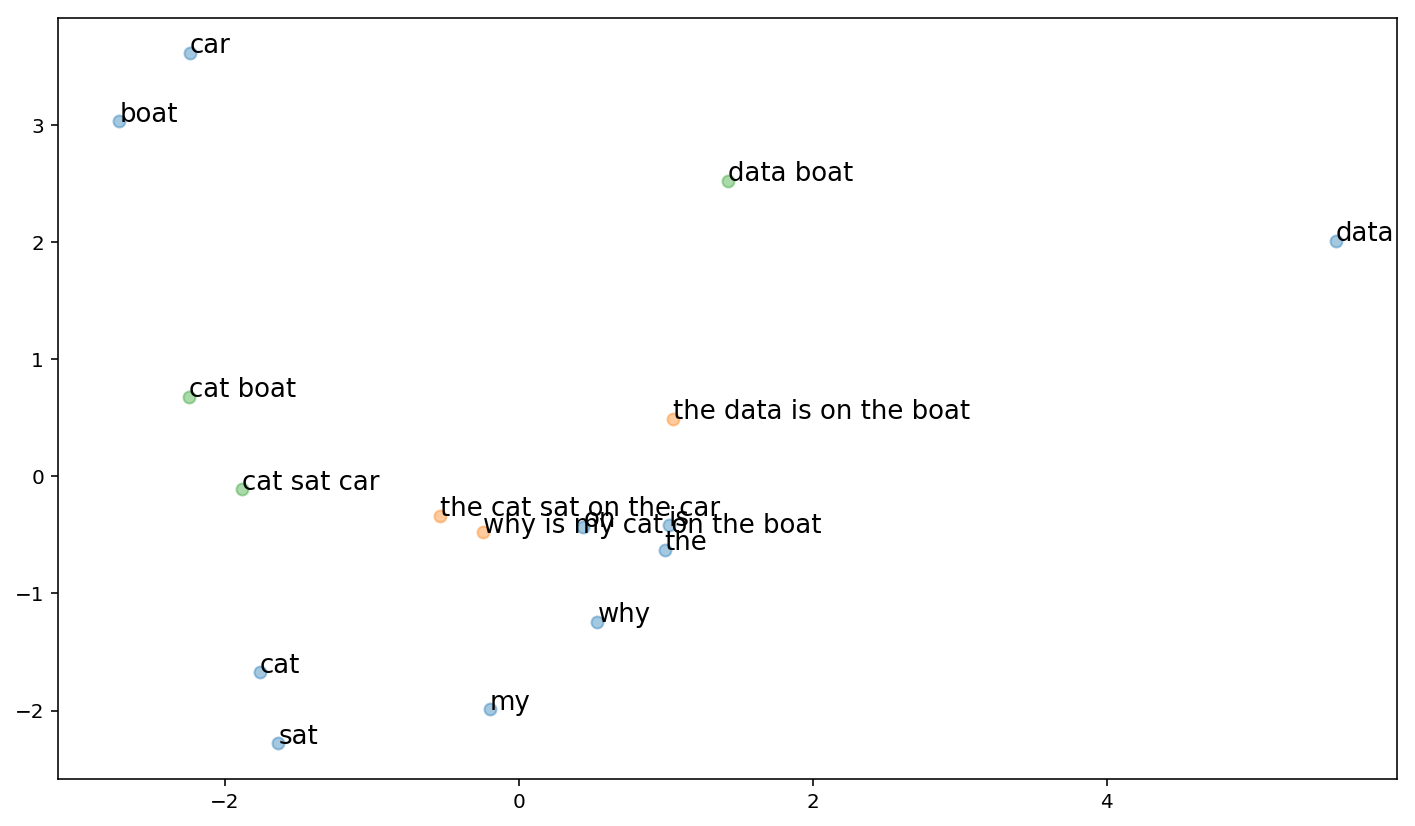

In [143]:
plt.figure(figsize=(12,7))

plot_text_vectors(word_labels, word_vectors_2)

plot_text_vectors(text_data, doc_vectors_2)    

plot_text_vectors(text_wo_stop_words, text_wo_stop_words_vectors_2)    
    
plt.show()

### Word vectors in getting similar articles

In [108]:
text_wo_stop_words

['cat boat', 'cat boat', 'cat boat']

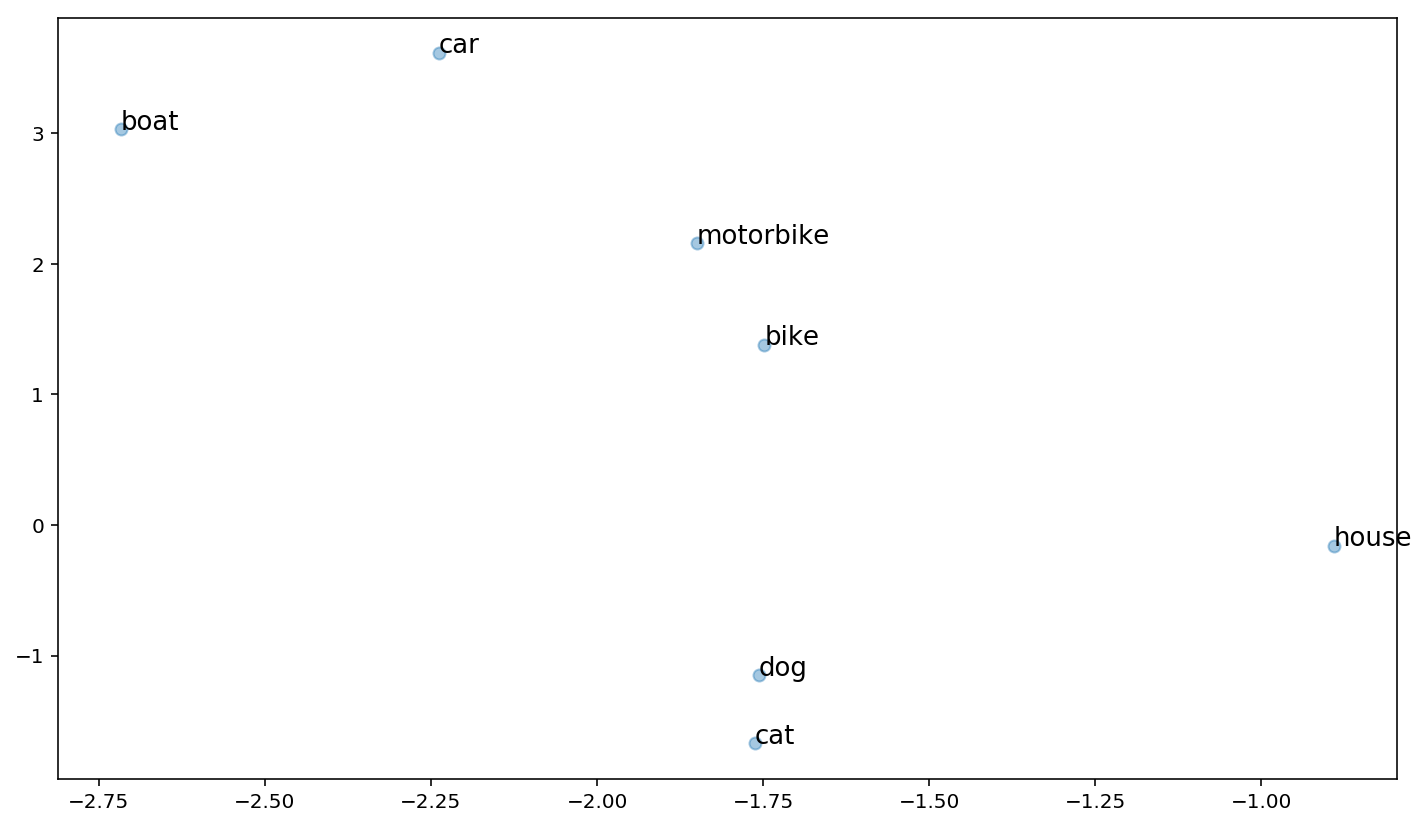

In [151]:
words = ['car','boat','cat','dog','bike','motorbike','house']

plt.figure(figsize=(12,7))

plot_text_vectors(words, pca.transform(get_text_vectors(words)))

plt.show()

## Scarpe some medium article titles

In [5]:
import requests
from bs4 import BeautifulSoup

In [18]:
r = requests.get(url='https://medium.com/search/posts?q=data&count=200')

In [19]:
body = BeautifulSoup(r.text,  'html.parser')

In [20]:
arts = body.find('div', {'class', 'js-postListHandle'})

In [22]:
titles = []

for a in arts.find_all('h3'):
    titles.append(a.text)
    print(a.text)

Design better data tables
Your Facebook data is creepy as hell
Cheat Sheets for AI, Neural Networks, Machine Learning, Deep Learning & Big Data
Why so many data scientists are leaving their jobs
Why SQL is beating NoSQL, and what this means for the future of data
I built an app that makes learning algorithms and data structures way more fun
If You Want to Be Creative, Don’t Be Data Driven
Design words with data
The 10 Statistical Techniques Data Scientists Need to Master
If you want to learn Data Science, start with one of these programming classes
I ranked every Intro to Data Science course on the internet, based on thousands of data points
The best Data Science courses on the internet, ranked by your reviews
I learned all data structures in a week. This is what it did to my brain.
The 5 Clustering Algorithms Data Scientists Need to Know
A Beginner’s Guide to Data Engineering — Part I
Which Languages Should You Learn For Data Science?
Design Better Data Tables
I Dropped Out of School 

In [24]:
import pandas as pd

In [25]:
titles = pd.Series(titles)

In [27]:
titles.to_csv('medium_articles.csv')

# NN visual

In [41]:
np.random.seed(42)

data = np.random.random([13,2])

In [6]:
from sklearn.neighbors import NearestNeighbors

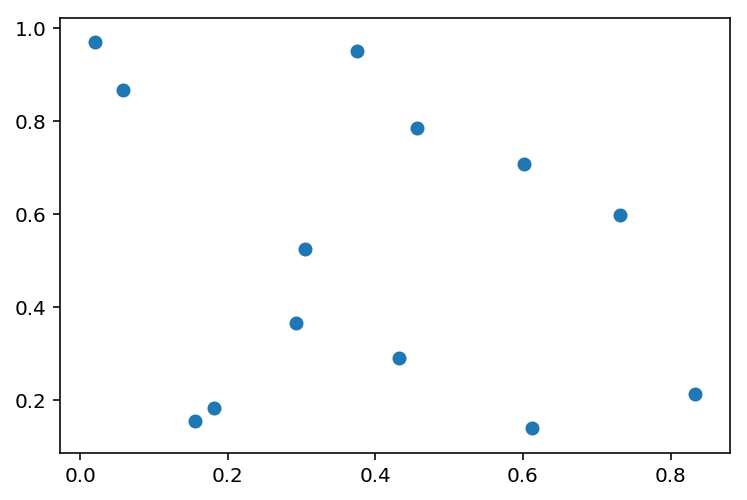

In [43]:
plt.scatter(data[:,0], data[:,1])
plt.show()

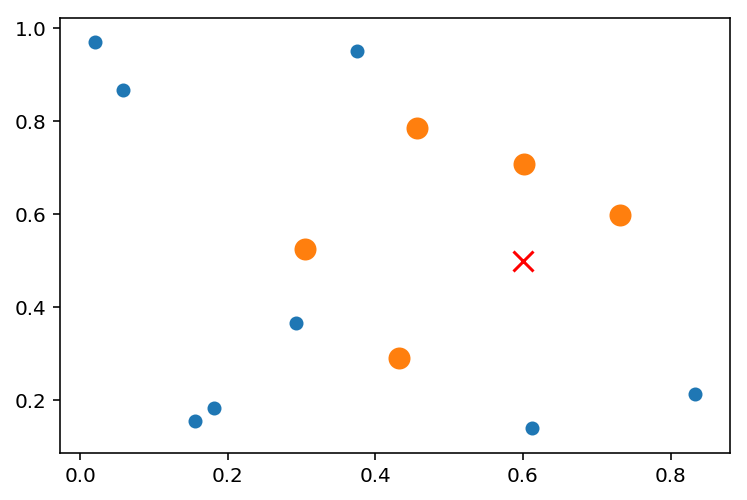

In [55]:
neig = NearestNeighbors(n_neighbors=5)
neig.fit(data)

dist, nodes =  neig.kneighbors([[0.6, 0.5]])

closest_nodes = np.take(data, nodes, axis=0)

plt.scatter(data[:,0], data[:,1])

plt.scatter(closest_nodes[0][:,0], closest_nodes[0][:,1], s=100)

plt.scatter([0.6], [0.5], marker='x', c='r', s= 100)

plt.show()


In [17]:
data

array([[ 0.37454012,  0.95071431],
       [ 0.73199394,  0.59865848],
       [ 0.15601864,  0.15599452],
       [ 0.05808361,  0.86617615],
       [ 0.60111501,  0.70807258],
       [ 0.02058449,  0.96990985],
       [ 0.83244264,  0.21233911]])

In [23]:
closest_nodes

array([[[ 0.73199394,  0.59865848],
        [ 0.83244264,  0.21233911],
        [ 0.60111501,  0.70807258]]])